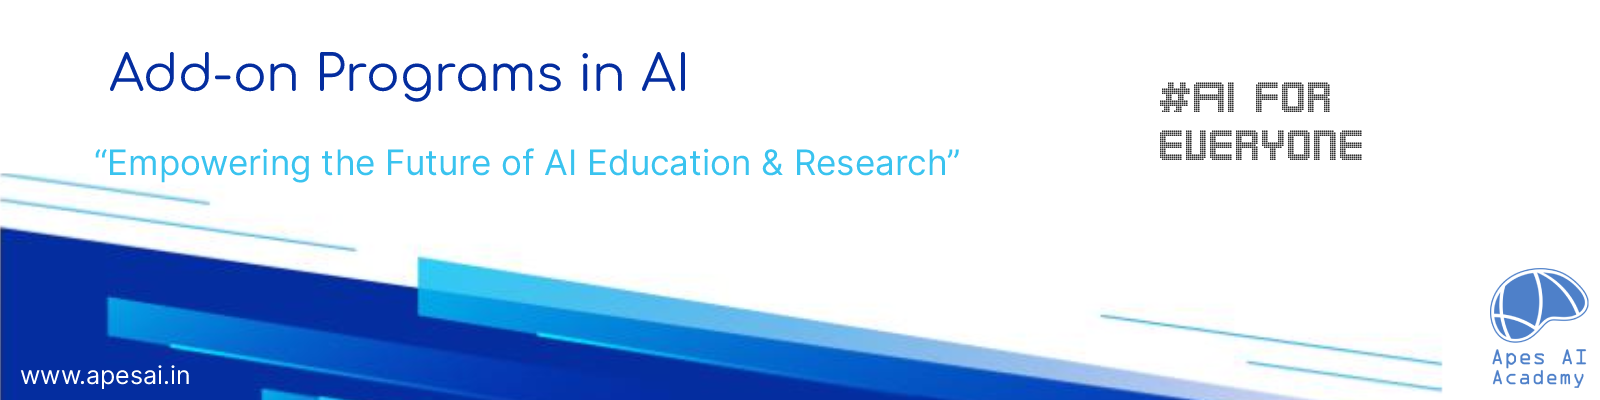

# Task



*   Load MNIST dataset (Hand written digits dataset)
*   Train DNN and experiment with different number of layers and neurons.
*  Now train the DNN with only two class from the dataset (A binary classifier using DNN)
* Apply Normalization to the image data and then train, and analyze the improvement.


**Search and find the code/solution and solve errors. Do not use any Copilot*



In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

2025-10-22 16:59:20.538946: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-22 16:59:23.554720: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-22 16:59:34.029734: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


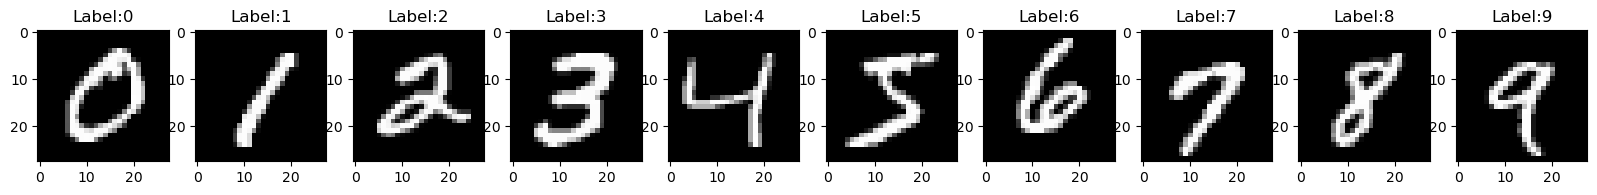

In [2]:
hand_written=keras.datasets.mnist
(X_train, y_train), (X_test,y_test) = hand_written.load_data()

num_classes = 10

fig, ax = plt.subplots(1, num_classes, figsize=(20,20)) 

for i in range(num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Label:{i}")

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

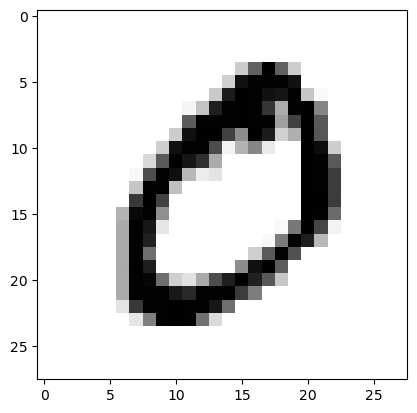

In [10]:
plt.imshow(X_train[1], cmap = 'binary')
plt.show()

In [11]:
y_train[1]

0

In [13]:
ANN=keras.models.Sequential()
ANN.add(keras.layers.Flatten(input_shape = [28,28]))
ANN.add(keras.layers.Dense(100,activation='relu'))
ANN.add(keras.layers.Dense(10,activation='softmax'))


/home/thamanna/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-10-21 21:57:09.963748: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
ANN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
ANN.compile(loss='sparse_categorical_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])

In [16]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [18]:
h_ANN=ANN.fit(X_train,y_train,epochs=10,validation_split=0.1,callbacks=[tbCallBack])

2025-10-21 22:03:48.059659: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42336000 exceeds 10% of free system memory.


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.8364 - loss: 3.0142 - val_accuracy: 0.8848 - val_loss: 0.5003
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 27ms/step - accuracy: 0.9007 - loss: 0.4426 - val_accuracy: 0.9257 - val_loss: 0.3428
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9194 - loss: 0.3184 - val_accuracy: 0.9418 - val_loss: 0.2559
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9316 - loss: 0.2687 - val_accuracy: 0.9375 - val_loss: 0.2497
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9392 - loss: 0.2376 - val_accuracy: 0.9465 - val_loss: 0.1974
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 28ms/step - accuracy: 0.9439 - loss: 0.2196 - val_accuracy: 0.9442 - val_loss: 0.2398
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 88s 32ms/step - accuracy: 0.9486 - loss: 0.1979 - val_accuracy: 0.9435 - val_loss: 0.2088
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 38ms/step - accuracy: 0.9497 -

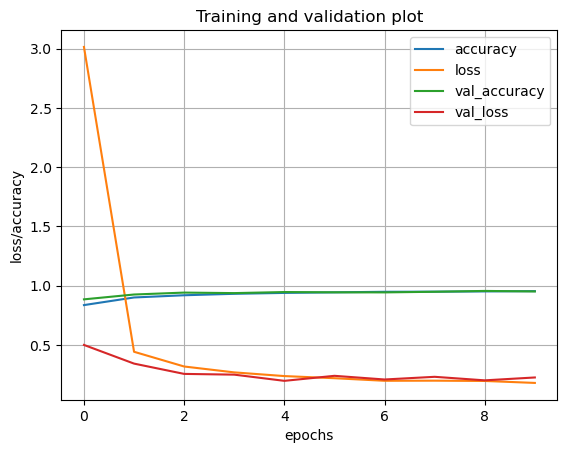

In [20]:
import pandas as pd
pd.DataFrame(h_ANN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [22]:
test_loss,test_accuracy=ANN.evaluate(X_test,y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9533 - loss: 0.1601
Test loss: 0.1601165533065796, Test accuracy: 0.9532999992370605


In [33]:
DNN=keras.models.Sequential()
DNN.add(keras.layers.Flatten(input_shape=[28,28]))
DNN.add(keras.layers.Dense(600,activation='relu'))
DNN.add(keras.layers.Dense(400,activation='relu'))
DNN.add(keras.layers.Dense(200,activation='relu'))
DNN.add(keras.layers.Dense(10,activation='softmax'))

In [25]:
DNN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 400)            │       240,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 793,610 (3.03 MB)

 Trainable params: 793,610 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

DNN.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [ ]:

h_DNN=DNN.fit(X_train,y_train,epochs=10,validation_split=0.1,callbacks=[tbCallBack])

2025-10-21 22:33:30.757547: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42336000 exceeds 10% of free system memory.


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 214s 123ms/step - accuracy: 0.9018 - loss: 1.0437 - val_accuracy: 0.9492 - val_loss: 0.1972
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 178s 105ms/step - accuracy: 0.9466 - loss: 0.1985 - val_accuracy: 0.9450 - val_loss: 0.2188
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 206s 122ms/step - accuracy: 0.9566 - loss: 0.1600 - val_accuracy: 0.9540 - val_loss: 0.1738
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 139s 82ms/step - accuracy: 0.9634 - loss: 0.1304 - val_accuracy: 0.9568 - val_loss: 0.1854
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 165s 96ms/step - accuracy: 0.9680 - loss: 0.1176 - val_accuracy: 0.9618 - val_loss: 0.1377
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 206s 98ms/step - accuracy: 0.9726 - loss: 0.1035 - val_accuracy: 0.9725 - val_loss: 0.1220
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 164s 97ms/step - accuracy: 0.9764 - loss: 0.0891 - val_accuracy: 0.9702 - val_loss: 0.1232
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 161s 95ms/step - accurac

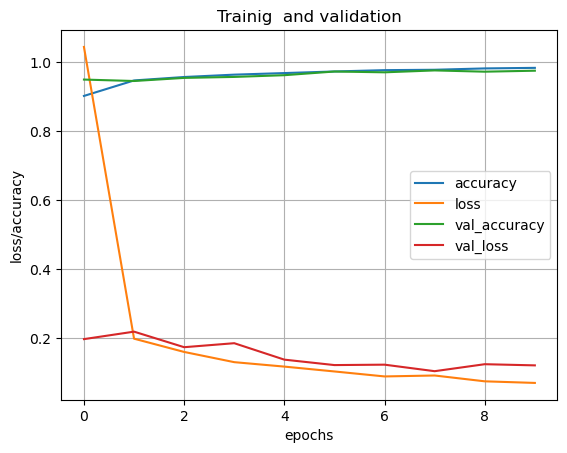

In [40]:
pd.DataFrame(h_DNN.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.grid(True)
plt.title('Trainig  and validation')
plt.show()

In [41]:
test_loss,test_accuracy=DNN.evaluate(X_test,y_test)
print('test loss:',test_loss,'test accuracy:',test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9700 - loss: 0.1463
test loss: 0.1462993025779724 test accuracy: 0.9700000286102295


In [4]:
DNN2=keras.models.Sequential()
DNN2.add(keras.layers.Flatten(input_shape=[28,28]))
DNN2.add(keras.layers.Dense(700,activation='relu'))
DNN2.add(keras.layers.Dense(500,activation='relu'))
DNN2.add(keras.layers.Dense(300,activation='relu'))
DNN2.add(keras.layers.Dense(100,activation='relu'))
DNN2.add(keras.layers.Dense(10,activation='softmax'))

/home/thamanna/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-10-22 12:46:15.465618: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
DNN2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 700)            │       549,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,081,410 (4.13 MB)

 Trainable params: 1,081,410 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
DNN2.compile(loss='sparse_categorical_crossentropy' , optimizer='adam',metrics=['accuracy'])

In [7]:
tbCallBack=keras.callbacks.TensorBoard(log_dir='tbGraph')

In [8]:
DNN_model=DNN2.fit(X_train,y_train,epochs=10,validation_split=0.1,callbacks=tbCallBack)

2025-10-22 12:50:59.781251: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42336000 exceeds 10% of free system memory.


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 280s 160ms/step - accuracy: 0.9087 - loss: 0.6041 - val_accuracy: 0.9523 - val_loss: 0.1693
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 265s 127ms/step - accuracy: 0.9496 - loss: 0.1764 - val_accuracy: 0.9605 - val_loss: 0.1391
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 138s 82ms/step - accuracy: 0.9607 - loss: 0.1411 - val_accuracy: 0.9650 - val_loss: 0.1277
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 145s 83ms/step - accuracy: 0.9657 - loss: 0.1227 - val_accuracy: 0.9632 - val_loss: 0.1265
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 140s 83ms/step - accuracy: 0.9709 - loss: 0.1067 - val_accuracy: 0.9682 - val_loss: 0.1253
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 93s 55ms/step - accuracy: 0.9753 - loss: 0.0917 - val_accuracy: 0.9698 - val_loss: 0.1345
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 152s 90ms/step - accuracy: 0.9788 - loss: 0.0832 - val_accuracy: 0.9767 - val_loss: 0.0927
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 177s 75ms/step - accuracy:

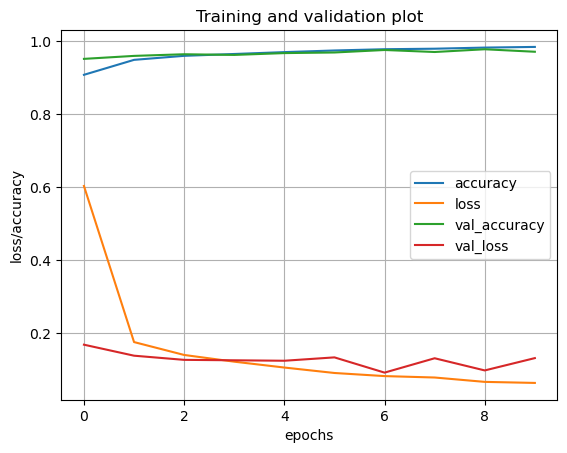

In [12]:
import pandas as pd
pd.DataFrame(DNN_model.history).plot()
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.title('Training and validation plot')
plt.show()

In [13]:
test_loss,test_accuracy=DNN2.evaluate(X_test,y_test)
print('Test loss:',test_loss,'Test accuracy:',test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9692 - loss: 0.1408
Test loss: 0.14076924324035645 Test accuracy: 0.9692000150680542


                                 BINARY CLASSIFIER

In [ ]:

train_mask = (y_train == 0) | (y_train == 1)
test_mask = (y_test == 0) | (y_test == 1)

x_train_binary = X_train[train_mask]
y_train_binary = y_train[train_mask]

x_test_binary = X_test[test_mask]
y_test_binary = y_test[test_mask]





In [35]:
DNN3=keras.models.Sequential()
DNN3.add(keras.layers.Flatten(input_shape=(28,28)))
DNN3.add(keras.layers.Dense(300,activation='relu'))
DNN3.add(keras.layers.Dense(100,activation='relu'))
DNN3.add(keras.layers.Dense(1,activation='sigmoid'))


/home/thamanna/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
DNN3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 797,105 (3.04 MB)

 Trainable params: 265,701 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 531,404 (2.03 MB)

In [38]:
DNN3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:

tbCallback =tf.keras.callbacks.TensorBoard(log_dir='tbGraph')


In [40]:
history3 = DNN3.fit(x_train_binary,y_train_binary,epochs=10,validation_split=0.1,callbacks=[tbCallback])

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.9954 - loss: 0.3931 - val_accuracy: 0.9968 - val_loss: 0.2630
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.9984 - loss: 0.2008 - val_accuracy: 1.0000 - val_loss: 4.2727e-11
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9982 - loss: 0.1736 - val_accuracy: 1.0000 - val_loss: 2.9941e-09
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9989 - loss: 0.0497 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 26s 73ms/step - accuracy: 0.9990 - loss: 0.0586 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9997 - loss: 0.0157 - val_accuracy: 0.9984 - val_loss: 0.1218
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.9992 - loss: 0.0478 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.99

<function matplotlib.pyplot.show(close=None, block=None)>

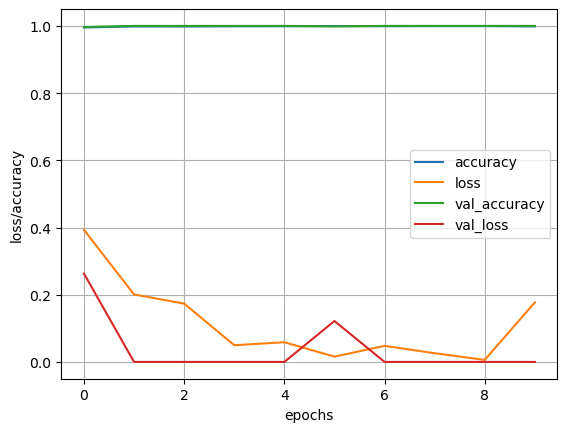

In [41]:
import pandas as pd
pd.DataFrame(history3.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.grid(True)
plt.show

In [42]:
test_loss,test_accuracy=DNN3.evaluate(x_test_binary,y_test_binary)
print("Test loss:",test_loss, "Test accuracy:",test_accuracy)

67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9995 - loss: 0.0068    
Test loss: 0.006775889545679092 Test accuracy: 0.9995272159576416


                                                NORMALIZATION

In [4]:
train_mean=X_train.mean()
train_std=X_train.std()
X_train_std=(X_train-train_mean)/train_std
X_test_std=(X_test-train_mean)/train_std

In [5]:
DNN_normalized=keras.models.Sequential()
DNN_normalized.add(keras.layers.Flatten(input_shape=[28,28]))
DNN_normalized.add(keras.layers.Dense(600,activation='relu'))
DNN_normalized.add(keras.layers.Dense(400,activation='relu'))
DNN_normalized.add(keras.layers.Dense(200,activation='relu'))
DNN_normalized.add(keras.layers.Dense(10,activation='softmax'))


/home/thamanna/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-10-22 17:00:52.439552: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
DNN_normalized.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [9]:
h_DNN_normalized=DNN_normalized.fit(X_train_std,y_train,epochs=10,validation_split=0.1,callbacks=[tbCallback])

2025-10-22 17:01:29.029377: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 169344000 exceeds 10% of free system memory.


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8975 - loss: 0.3249

2025-10-22 17:04:03.946448: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 18816000 exceeds 10% of free system memory.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 157s 90ms/step - accuracy: 0.9356 - loss: 0.2089 - val_accuracy: 0.9680 - val_loss: 0.1067
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 194s 86ms/step - accuracy: 0.9679 - loss: 0.1056 - val_accuracy: 0.9748 - val_loss: 0.0922
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 145s 86ms/step - accuracy: 0.9754 - loss: 0.0787 - val_accuracy: 0.9725 - val_loss: 0.0990
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 150s 89ms/step - accuracy: 0.9811 - loss: 0.0650 - val_accuracy: 0.9697 - val_loss: 0.1076
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 152s 90ms/step - accuracy: 0.9834 - loss: 0.0542 - val_accuracy: 0.9708 - val_loss: 0.1190
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 149s 88ms/step - accuracy: 0.9856 - loss: 0.0472 - val_accuracy: 0.9710 - val_loss: 0.1285
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 143s 85ms/step - accuracy: 0.9885 - loss: 0.0404 - val_accuracy: 0.9765 - val_loss: 0.1072
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 147s 87ms/step - accuracy: 0.9884 - lo

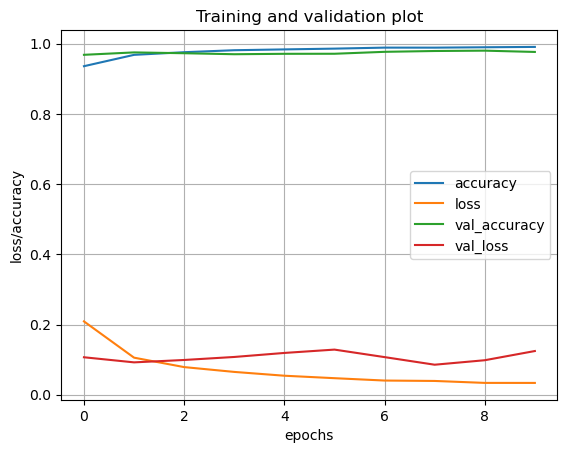

In [10]:
import pandas as pd
pd.DataFrame(h_DNN_normalized.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [11]:
test_loss,test_accuracy=DNN_normalized.evaluate(X_test_std,y_test)
print("Test loss:",test_loss, "Test accuracy:",test_accuracy)

2025-10-22 17:29:56.772986: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9737 - loss: 0.1177
Test loss: 0.11774007230997086 Test accuracy: 0.9736999869346619


Test Accuracy of the model:

1 hidden layer :  0.9532999992370605

3 hidden layer : 0.9700000286102295 

4 hidden layer : 0.9692000150680542

Normalized model with 3 hidden layer : 0.9736999869346619

The normalized model featuring  three hidden layers has the highest accuracy.
